<div class="alert alert-block alert-info" style="display:flex; justify-content:center; align-items:center; height:170px;">
   <h1 style="font-size: 36px; text-align:center;">DupliQuest - Identify Duplicate Question Pairs (Part -1 Machine Learning)</h1>
</div>


**Project Team:**
- `Ankit Kumar Aggarwal`

- `Avinash Rajaraman Swaminathan`

- `Kanchan Maurya`

- `Shengjie Zhao`

![Duplicate Question Pairs](duplicatequestionpairs.png)

In [430]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [431]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [432]:
df = pd.read_csv('ques_pairs_extra.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


In [433]:
# new_df = df.sample(5000,random_state=2)
new_df=df.copy()

In [434]:
new_df.shape

(404315, 6)

In [435]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


In [436]:
new_df.describe()

,id,qid1,qid2,is_duplicate
count,404315.000000,404315.000000,404315.000000,404315.000000
mean,202157.000000,217263.773122,220975.256597,0.369237
std,116715.831381,157766.979141,159917.666623,0.482599
min,0.000000,1.000000,2.000000,0.000000
25%,101078.500000,74448.500000,74734.000000,0.000000
50%,202157.000000,192199.000000,197077.000000,0.000000
75%,303235.500000,346604.000000,354720.500000,1.000000
max,404314.000000,537982.000000,537983.000000,1.000000


## Inference:

The mean (average) of the is_duplicate column is approximately 0.369. This suggests that about 36.9% of the question pairs in the dataset are marked as duplicates.

## Missing values analysis

In [290]:
print(new_df.isnull().sum())

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64


In [291]:
# Calculate the percentage of missing values in each column
missing_percent = new_df.isnull().sum() * 100 / len(new_df)

print(missing_percent)

id              0.000000
qid1            0.000000
qid2            0.000000
question1       0.000247
question2       0.000495
is_duplicate    0.000000
dtype: float64


In [292]:
# Display rows where 'question1' is missing
new_df[new_df['question1'].isnull()]

,id,qid1,qid2,question1,question2,is_duplicate
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English name is most suitable for me considering the pronounciation of my Chinese name?,0


In [293]:
# Display rows where 'question2' is missing
new_df[new_df['question2'].isnull()]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0


## Inference:

Since the number of missing values is very small and question pairs are not present, we can remove these rows without impacting overall dataset.

In [294]:
# Drop the rows with missing values
new_df = new_df.dropna()

In [295]:
print(new_df.isnull().sum())

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64


# Visualization:
## Distribution

In [296]:
# Count the number of each class in the 'is_duplicate' column
class_counts = new_df['is_duplicate'].value_counts()

# Print the class counts
print(class_counts)

is_duplicate
0    255024
1    149288
Name: count, dtype: int64


In [297]:
# Calculate the percentage of each class
class_percentage = class_counts / len(new_df) * 100

print(class_percentage)

is_duplicate
0    63.07604
1    36.92396
Name: count, dtype: float64


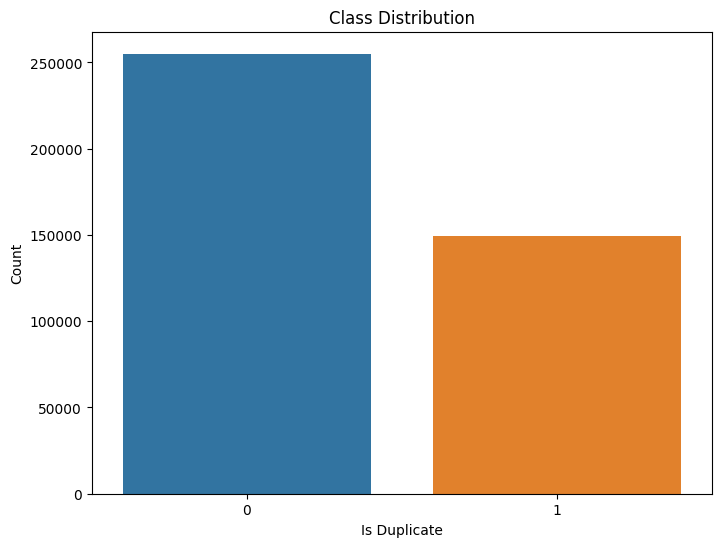

In [298]:
# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='is_duplicate', data=new_df)
plt.title('Class Distribution')
plt.xlabel('Is Duplicate')
plt.ylabel('Count')
plt.show()

## Inference:

From above plot, we can see that the dataset is almost imbalanced, with a higher number of non-duplicate question pairs (class 0) than duplicate question pairs (class 1).

## Length of questions

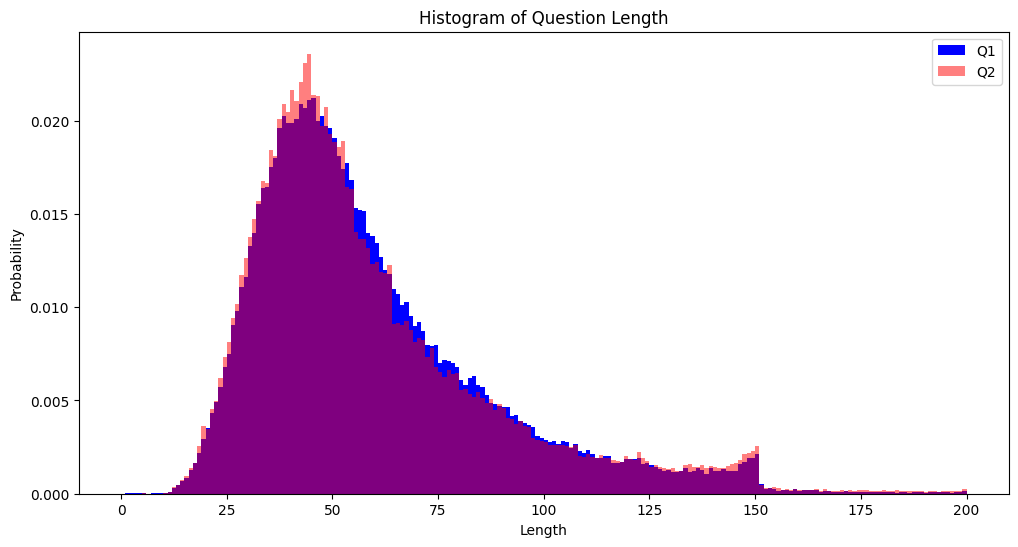

In [299]:
# Plot histogram of question lengths
plt.figure(figsize=(12, 6))
plt.hist(new_df['question1'].str.len(), bins=200, range=[0, 200], color='blue', density=True, label='Q1')
plt.hist(new_df['question2'].str.len(), bins=200, range=[0, 200], color='red', density=True, alpha=0.5, label='Q2')
plt.title('Histogram of Question Length')
plt.legend()
plt.xlabel('Length')
plt.ylabel('Probability')
plt.show()

In [300]:
# Calculate descriptive statistics for question lengths
q1_lengths = new_df['question1'].str.len()
q2_lengths = new_df['question2'].str.len()

print("Question 1 Lengths:")
print(q1_lengths.describe())

print("\nQuestion 2 Lengths:")
print(q2_lengths.describe())

Question 1 Lengths:
count    404312.000000
mean         59.535376
std          29.940661
min           1.000000
25%          39.000000
50%          52.000000
75%          72.000000
max         623.000000
Name: question1, dtype: float64

Question 2 Lengths:
count    404312.000000
mean         60.106925
std          33.863446
min           1.000000
25%          39.000000
50%          51.000000
75%          72.000000
max        1169.000000
Name: question2, dtype: float64


## Inference:

From above results, overall it seems that the lengths of questions in both 'question1' and 'question2' are quite similar on average, but **'question2' has a wider range of lengths and contains some very long questions**.

## Word frequency Analysis

In [301]:
# !pip install wordcloud

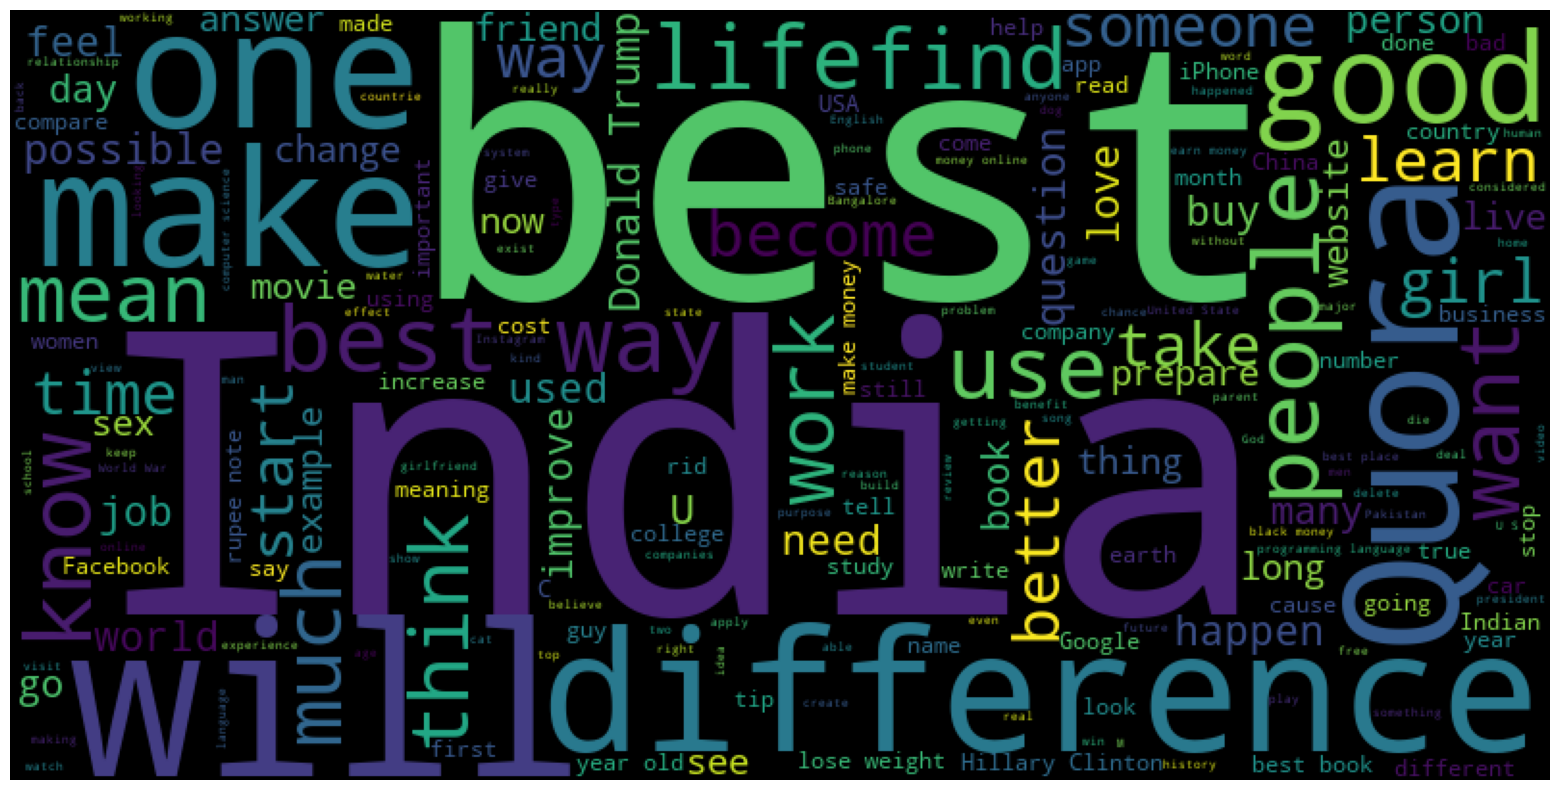

In [302]:
from wordcloud import WordCloud

text = ' '.join(new_df['question1'].tolist() + new_df['question2'].tolist())
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [303]:
# Determine the number of samples from each class to take
num_samples_per_class = 1000 // len(new_df['is_duplicate'].unique())

In [304]:
num_samples_per_class

500

In [305]:
# stratified sampling to take into account of representative sample of data
new_df = new_df.groupby('is_duplicate').apply(lambda x: x.sample(num_samples_per_class, random_state=1)).reset_index(drop=True)

# Check the class distribution in the sample
print(new_df['is_duplicate'].value_counts(normalize=True) * 100)

is_duplicate
0    50.0
1    50.0
Name: proportion, dtype: float64


In [306]:
len(new_df)

1000

# Text Preprocessing

In [307]:
# Source: https://pypi.org/project/clean-text/, This package provides various cleaning methods.

# !pip install cleantext
# !pip install clean-text

#### As contractions (e.g, "it's" can mean "it is" or "it has", and "I'd" can mean "I would" or "I had") are quite common in questions asked by users, We are leveraging the extensive library **"contractions" offers accurate preprocessing of words**.

In [308]:
# Source:  https://www.educative.io/answers/how-to-deal-with-contractions-in-nlp
# !pip install contractions

In [309]:
# !pip install pandarallel

In [310]:
# !pip install pyspellchecker

In [311]:
# !pip install unidecode

In [312]:
# Import the necessary modules for the cleaning process.
from cleantext import clean
from bs4 import BeautifulSoup
import re
import contractions
from tqdm import tqdm
from unidecode import unidecode
import time
from spellchecker import SpellChecker
from pandarallel import pandarallel

# Initialize a spell checker object
spell = SpellChecker()

# Define a function to expand contractions in a piece of text.
def fix_contractions(text):
    return contractions.fix(text)

In [313]:
# Initialize pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 14 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [314]:
tqdm.pandas()

def preprocess_helper(text):
    
    # Handle unicode issues
    text = unidecode(text)

      # Clean the text
    text = clean(text,
                 to_ascii=True,
                 lower=True,                     # lowercase text
                 no_line_breaks=True,            # remove line breaks
                 no_urls=True,                   # replace URLs with a special token
                 no_emails=True,                 # replace email addresses with a special token
                 no_phone_numbers=True,          # replace phone numbers with a special token
                 no_numbers=False,
                 no_digits=False,
                 no_currency_symbols=True,       # replace currency symbols with a special token
                 no_punct=True,                  # remove punctuations
                 replace_with_url="<URL>",
                 replace_with_email="<EMAIL>",
                 replace_with_phone_number="<PHONE>",
                 replace_with_currency_symbol="<CUR>",
                 lang="en")

    # Replace certain special characters with their string equivalents
    text = re.sub(r'%', ' percent', text)
    text = re.sub(r'$', ' dollar ', text)
    text = re.sub(r'₹', ' rupee ', text)
    text = re.sub(r'€', ' euro ', text)
    text = re.sub(r'@', ' at ', text)

    # Decontracting words
    text = fix_contractions(text)

    # Removing HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Correct spelling
    text = spell.correction(text)

    return text

In [315]:
new_df.shape

(1000, 6)

In [316]:
start = time.time()
new_df['question1'] = new_df['question1'].progress_apply(preprocess_helper)
new_df['question2'] = new_df['question2'].progress_apply(preprocess_helper)
end = time.time()
print("Elapsed Time for Preprocessing:", end - start)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:19<00:00,  5.01it/s]

Elapsed Time for Preprocessing: 402.91673278808594


In [317]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,293203,16206,414938,can you be prosecuted for a crime committed in another country dollar,can someone be tried andor sentenced to prison in a country heshe had never been before and is not a citizen of that said country for a crime heshe committed in another country dollar,0
1,238144,349452,349453,what is the most beautiful implementation of convex hull you have ever seen dollar,which is the most delicate algorithm to implement dollar,0
2,136453,217718,203397,what are the best ways to forget the past dollar,None,0
3,325263,451485,451486,how do i not make my boyfriend sad dollar,how can i make my selfish boyfriend love me dollar,0
4,184554,281939,281940,is it true that the united states owes a lot of money to china dollar,what is a consecutive calendar day and how is it related with the gaulish calendar dollar,0


## Feature Engineering

In [318]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [319]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
0,293203,16206,414938,can you be prosecuted for a crime committed in another country dollar,can someone be tried andor sentenced to prison in a country heshe had never been before and is not a citizen of that said country for a crime heshe committed in another country dollar,0,70.0,184.0
1,238144,349452,349453,what is the most beautiful implementation of convex hull you have ever seen dollar,which is the most delicate algorithm to implement dollar,0,83.0,57.0
2,136453,217718,203397,what are the best ways to forget the past dollar,None,0,49.0,NaN
3,325263,451485,451486,how do i not make my boyfriend sad dollar,how can i make my selfish boyfriend love me dollar,0,42.0,51.0
4,184554,281939,281940,is it true that the united states owes a lot of money to china dollar,what is a consecutive calendar day and how is it related with the gaulish calendar dollar,0,70.0,90.0


### Analyzing missing values

In [320]:
# Check if there are any None values in the 'question1' column
print(new_df['question1'].isnull().sum())

# Check if there are any None values in the 'question2' column
print(new_df['question2'].isnull().sum())

101
103


In [321]:
# Calculate the percentage of missing values in 'question1' column
q1_missing_percentage = (new_df['question1'].isnull().sum() / len(new_df)) * 100
print(f"Percentage of missing values in 'question1': {q1_missing_percentage}%")

# Calculate the percentage of missing values in 'question2' column
q2_missing_percentage = (new_df['question2'].isnull().sum() / len(new_df)) * 100
print(f"Percentage of missing values in 'question2': {q2_missing_percentage}%")

Percentage of missing values in 'question1': 10.100000000000001%
Percentage of missing values in 'question2': 10.299999999999999%


-  Given that 10% is not an overwhelming amount of missing data, we could consider simply removing these rows. Although this can result in a loss of data, but it would ensure that the model built is only trained on complete pairs of questions.

In [322]:
# Remove rows with missing values
new_df = new_df.dropna(subset=['question1', 'question2'])

In [323]:
# Check if there are any None values in the 'question1' column
print(new_df['question1'].isnull().sum())

# Check if there are any None values in the 'question2' column
print(new_df['question2'].isnull().sum())

print(new_df.isnull().sum())

0
0
id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
q1_len          0
q2_len          0
dtype: int64


In [324]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
0,293203,16206,414938,can you be prosecuted for a crime committed in another country dollar,can someone be tried andor sentenced to prison in a country heshe had never been before and is not a citizen of that said country for a crime heshe committed in another country dollar,0,70.0,184.0,13,35
1,238144,349452,349453,what is the most beautiful implementation of convex hull you have ever seen dollar,which is the most delicate algorithm to implement dollar,0,83.0,57.0,15,10
3,325263,451485,451486,how do i not make my boyfriend sad dollar,how can i make my selfish boyfriend love me dollar,0,42.0,51.0,10,11
4,184554,281939,281940,is it true that the united states owes a lot of money to china dollar,what is a consecutive calendar day and how is it related with the gaulish calendar dollar,0,70.0,90.0,16,17
5,76832,131269,41053,what are the steps you made to get out of your comfort zone dollar,how can i come out of my comfort zone dollar,0,67.0,45.0,15,11


In [325]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [326]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
0,293203,16206,414938,can you be prosecuted for a crime committed in another country dollar,can someone be tried andor sentenced to prison in a country heshe had never been before and is not a citizen of that said country for a crime heshe committed in another country dollar,0,70.0,184.0,13,35,11
1,238144,349452,349453,what is the most beautiful implementation of convex hull you have ever seen dollar,which is the most delicate algorithm to implement dollar,0,83.0,57.0,15,10,5
3,325263,451485,451486,how do i not make my boyfriend sad dollar,how can i make my selfish boyfriend love me dollar,0,42.0,51.0,10,11,7
4,184554,281939,281940,is it true that the united states owes a lot of money to china dollar,what is a consecutive calendar day and how is it related with the gaulish calendar dollar,0,70.0,90.0,16,17,6
5,76832,131269,41053,what are the steps you made to get out of your comfort zone dollar,how can i come out of my comfort zone dollar,0,67.0,45.0,15,11,6


In [327]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [328]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
0,293203,16206,414938,can you be prosecuted for a crime committed in another country dollar,can someone be tried andor sentenced to prison in a country heshe had never been before and is not a citizen of that said country for a crime heshe committed in another country dollar,0,70.0,184.0,13,35,11,42
1,238144,349452,349453,what is the most beautiful implementation of convex hull you have ever seen dollar,which is the most delicate algorithm to implement dollar,0,83.0,57.0,15,10,5,25
3,325263,451485,451486,how do i not make my boyfriend sad dollar,how can i make my selfish boyfriend love me dollar,0,42.0,51.0,10,11,7,21
4,184554,281939,281940,is it true that the united states owes a lot of money to china dollar,what is a consecutive calendar day and how is it related with the gaulish calendar dollar,0,70.0,90.0,16,17,6,31
5,76832,131269,41053,what are the steps you made to get out of your comfort zone dollar,how can i come out of my comfort zone dollar,0,67.0,45.0,15,11,6,26


In [329]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,293203,16206,414938,can you be prosecuted for a crime committed in another country dollar,can someone be tried andor sentenced to prison in a country heshe had never been before and is not a citizen of that said country for a crime heshe committed in another country dollar,0,70.0,184.0,13,35,11,42,0.26
1,238144,349452,349453,what is the most beautiful implementation of convex hull you have ever seen dollar,which is the most delicate algorithm to implement dollar,0,83.0,57.0,15,10,5,25,0.20
3,325263,451485,451486,how do i not make my boyfriend sad dollar,how can i make my selfish boyfriend love me dollar,0,42.0,51.0,10,11,7,21,0.33
4,184554,281939,281940,is it true that the united states owes a lot of money to china dollar,what is a consecutive calendar day and how is it related with the gaulish calendar dollar,0,70.0,90.0,16,17,6,31,0.19
5,76832,131269,41053,what are the steps you made to get out of your comfort zone dollar,how can i come out of my comfort zone dollar,0,67.0,45.0,15,11,6,26,0.23


In [330]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features


In [331]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [332]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [333]:
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,293203,16206,414938,can you be prosecuted for a crime committed in another country dollar,can someone be tried andor sentenced to prison in a country heshe had never been before and is not a citizen of that said country for a crime heshe committed in another country dollar,0,70.0,184.0,13,35,11,42,0.26,0.833319,0.357140,0.833319,0.357140,0.833326,0.294117,1,1
1,238144,349452,349453,what is the most beautiful implementation of convex hull you have ever seen dollar,which is the most delicate algorithm to implement dollar,0,83.0,57.0,15,10,5,25,0.20,0.249994,0.142855,0.599988,0.428565,0.444440,0.285712,1,0


In [334]:
# !pip install Distance

In [335]:
import distance

def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    #length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    if len(strs) > 0:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
        length_features[2] = 0  # or any other appropriate value

    return length_features

In [336]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [337]:
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
0,293203,16206,414938,can you be prosecuted for a crime committed in another country dollar,can someone be tried andor sentenced to prison in a country heshe had never been before and is not a citizen of that said country for a crime heshe committed in another country dollar,0,70.0,184.0,13,35,11,42,0.26,0.833319,0.357140,0.833319,0.357140,0.833326,0.294117,1,1,22,23.0,0.535211
1,238144,349452,349453,what is the most beautiful implementation of convex hull you have ever seen dollar,which is the most delicate algorithm to implement dollar,0,83.0,57.0,15,10,5,25,0.20,0.249994,0.142855,0.599988,0.428565,0.444440,0.285712,1,0,5,11.5,0.224138


In [338]:
# !pip install fuzzywuzzy

In [339]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [340]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [341]:
print(new_df.shape)
new_df.head(5)

(831, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,293203,16206,414938,can you be prosecuted for a crime committed in another country dollar,can someone be tried andor sentenced to prison in a country heshe had never been before and is not a citizen of that said country for a crime heshe committed in another country dollar,0,70.0,184.0,13,35,11,42,0.26,0.833319,0.357140,0.833319,0.357140,0.833326,0.294117,1,1,22,23.0,0.535211,52,76,52,88
1,238144,349452,349453,what is the most beautiful implementation of convex hull you have ever seen dollar,which is the most delicate algorithm to implement dollar,0,83.0,57.0,15,10,5,25,0.20,0.249994,0.142855,0.599988,0.428565,0.444440,0.285712,1,0,5,11.5,0.224138,52,56,52,55
3,325263,451485,451486,how do i not make my boyfriend sad dollar,how can i make my selfish boyfriend love me dollar,0,42.0,51.0,10,11,7,21,0.33,0.749981,0.599988,0.599988,0.599988,0.666659,0.599994,1,1,1,9.5,0.255814,70,64,73,85
4,184554,281939,281940,is it true that the united states owes a lot of money to china dollar,what is a consecutive calendar day and how is it related with the gaulish calendar dollar,0,70.0,90.0,16,17,6,31,0.19,0.166664,0.124998,0.571420,0.499994,0.333331,0.312498,1,0,1,15.5,0.112676,38,53,41,58
5,76832,131269,41053,what are the steps you made to get out of your comfort zone dollar,how can i come out of my comfort zone dollar,0,67.0,45.0,15,11,6,26,0.23,0.749981,0.499992,0.333328,0.249997,0.499995,0.357140,1,0,4,12.0,0.456522,60,76,58,74


In [342]:
new_df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_len', 'q2_len', 'q1_num_words', 'q2_num_words', 'word_common',
       'word_total', 'word_share', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
       'mean_len', 'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'token_sort_ratio', 'token_set_ratio'],
      dtype='object')

In [343]:
new_df.dtypes

id                        int64
qid1                      int64
qid2                      int64
question1                object
question2                object
is_duplicate              int64
q1_len                  float64
q2_len                  float64
q1_num_words              int64
q2_num_words              int64
word_common               int64
word_total                int64
word_share              float64
cwc_min                 float64
cwc_max                 float64
csc_min                 float64
csc_max                 float64
ctc_min                 float64
ctc_max                 float64
last_word_eq              int64
first_word_eq             int64
abs_len_diff              int64
mean_len                float64
longest_substr_ratio    float64
fuzz_ratio                int64
fuzz_partial_ratio        int64
token_sort_ratio          int64
token_set_ratio           int64
dtype: object

In [344]:
new_df.isna().sum()

id                      0
qid1                    0
qid2                    0
question1               0
question2               0
is_duplicate            0
q1_len                  0
q2_len                  0
q1_num_words            0
q2_num_words            0
word_common             0
word_total              0
word_share              0
cwc_min                 0
cwc_max                 0
csc_min                 0
csc_max                 0
ctc_min                 0
ctc_max                 0
last_word_eq            0
first_word_eq           0
abs_len_diff            0
mean_len                0
longest_substr_ratio    0
fuzz_ratio              0
fuzz_partial_ratio      0
token_sort_ratio        0
token_set_ratio         0
dtype: int64

## Inference:

**Given the number of features we have created, it will be beneficial to perform feature selection to reduce the dimensionality of the  data. Feature selection can help to improve the performance of the model by reducing overfitting, improving accuracy, and reducing training time.**

## Feature Selection

### Identify highly correlated features

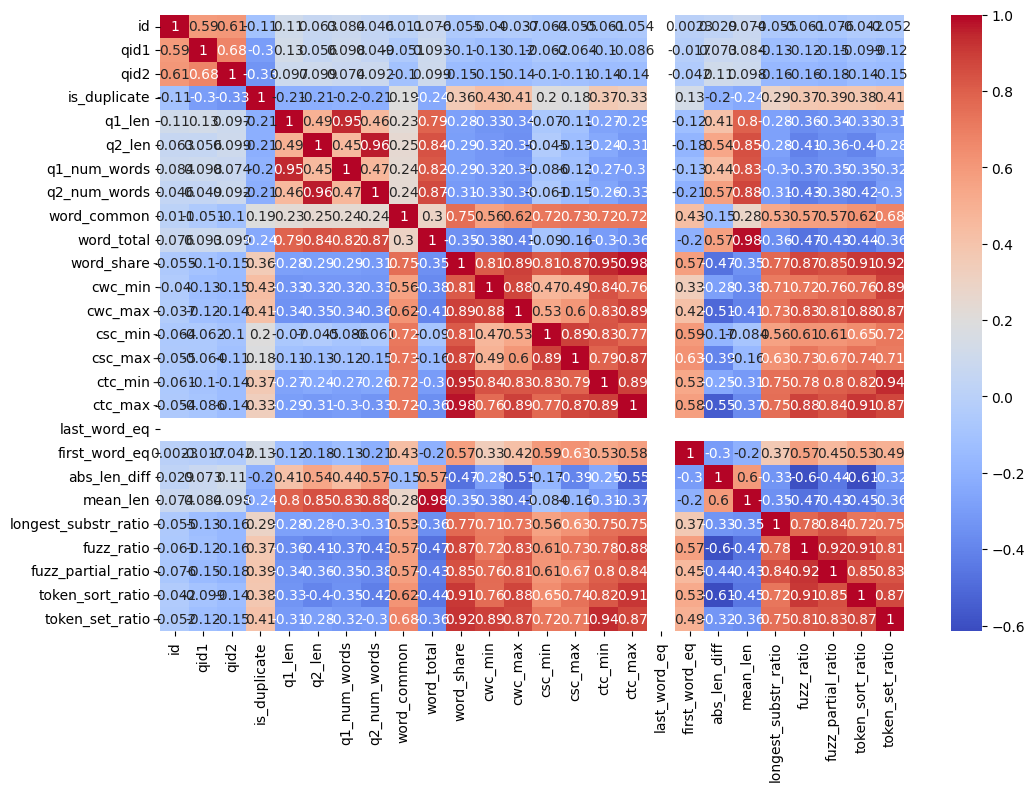

In [345]:
# Exclude non-numeric columns from correlation matrix calculation
numeric_columns = new_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Since there are too many features to visualize properly, lets break it down using upper and lower triangular matrix

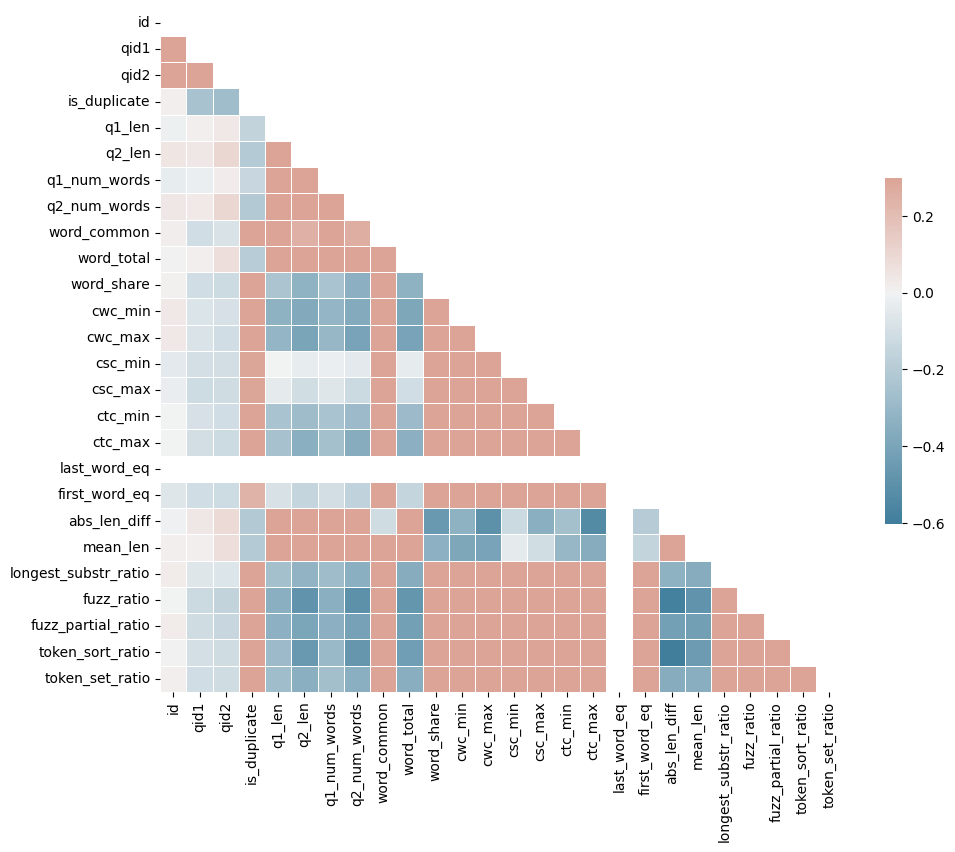

In [267]:
# Exclude non-numeric columns from correlation matrix calculation
numeric_columns = new_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

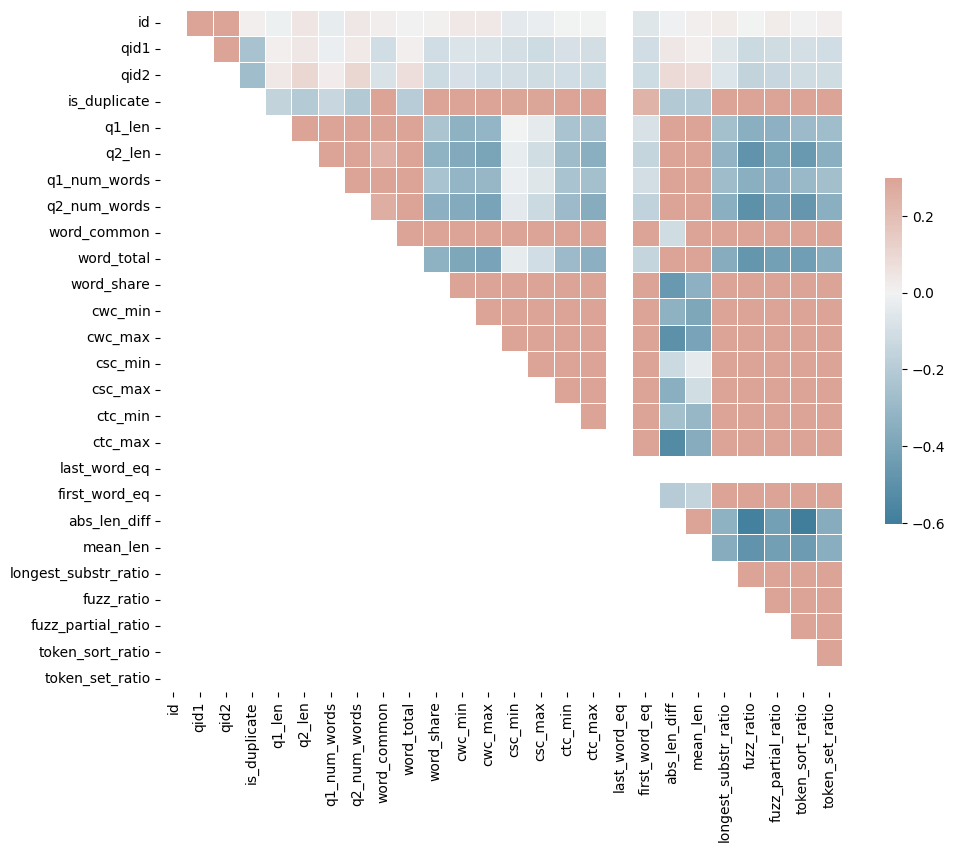

In [268]:
# Create a mask for the lower triangle
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [269]:
corr_matrix

,id,qid1,qid2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
id,1.000000,0.569586,0.603224,0.013146,-0.010546,0.044722,-0.032645,0.038979,0.016766,0.003715,0.003969,0.034234,0.032700,-0.043693,-0.024819,-0.002940,0.000245,NaN,-0.058305,-0.007133,0.008101,0.027408,-0.001729,0.027681,0.003658,0.010368
qid1,0.569586,1.000000,0.718674,-0.243563,0.007737,0.041680,-0.020934,0.031486,-0.107663,0.013434,-0.105864,-0.076575,-0.077921,-0.094879,-0.120612,-0.092998,-0.103625,NaN,-0.107617,0.042479,0.009276,-0.060002,-0.130494,-0.118583,-0.098330,-0.108036
qid2,0.603224,0.718674,1.000000,-0.271227,0.032614,0.102101,0.019038,0.102029,-0.083461,0.072707,-0.125267,-0.093607,-0.107798,-0.105040,-0.118605,-0.105747,-0.125202,NaN,-0.122372,0.091613,0.073732,-0.069749,-0.158071,-0.138534,-0.115404,-0.118765
is_duplicate,0.013146,-0.243563,-0.271227,1.000000,-0.156270,-0.200943,-0.139206,-0.209387,0.303243,-0.195187,0.453184,0.494267,0.469041,0.292691,0.292504,0.461155,0.428829,NaN,0.240272,-0.210365,-0.201657,0.361889,0.453968,0.441993,0.450481,0.499300
q1_len,-0.010546,0.007737,0.032614,-0.156270,1.000000,0.576758,0.952149,0.550947,0.360122,0.821952,-0.237933,-0.333372,-0.310728,-0.004893,-0.039109,-0.240006,-0.253147,NaN,-0.085083,0.323901,0.825142,-0.261338,-0.344991,-0.336347,-0.291671,-0.273599
q2_len,0.044722,0.041680,0.102101,-0.200943,0.576758,1.000000,0.535451,0.961022,0.253318,0.864940,-0.325444,-0.370962,-0.402881,-0.028933,-0.111165,-0.278217,-0.344732,NaN,-0.146667,0.630094,0.873531,-0.321705,-0.487675,-0.397895,-0.460234,-0.342012
q1_num_words,-0.032645,-0.020934,0.019038,-0.139206,0.952149,0.535451,1.000000,0.556391,0.371937,0.844497,-0.242293,-0.310133,-0.300590,-0.023994,-0.059497,-0.241876,-0.260605,NaN,-0.099366,0.329737,0.852622,-0.280863,-0.344895,-0.338679,-0.292460,-0.265775
q2_num_words,0.038979,0.031486,0.102029,-0.209387,0.550947,0.961022,0.556391,1.000000,0.259069,0.895575,-0.338377,-0.368152,-0.407019,-0.043820,-0.129239,-0.290593,-0.357526,NaN,-0.165687,0.644974,0.908570,-0.348326,-0.499177,-0.415143,-0.469380,-0.346558
word_common,0.016766,-0.107663,-0.083461,0.303243,0.360122,0.253318,0.371937,0.259069,1.000000,0.364393,0.714768,0.531765,0.556954,0.690774,0.727451,0.689789,0.685259,NaN,0.432984,-0.116913,0.349902,0.491025,0.526449,0.517678,0.566568,0.639579
word_total,0.003715,0.013434,0.072707,-0.195187,0.821952,0.864940,0.844497,0.895575,0.364393,1.000000,-0.334144,-0.386114,-0.406460,-0.035370,-0.107958,-0.290860,-0.340106,NaN,-0.150530,0.559768,0.987743,-0.357994,-0.476431,-0.424372,-0.434372,-0.350224


## Inference:
Based on the correlation matrix, we can see that **certain features have a high correlation with the is_duplicate target variable**. These features are important for detecting duplicate question pairs.

1. word_share
2. cwc_min
3. cwc_max
4. csc_min
5. csc_max
6. ctc_min
7. ctc_max
8. first_word_eq
9. longest_substr_ratio
10. fuzz_ratio
11. fuzz_partial_ratio
12. token_sort_ratio
13. token_set_ratio.

Note: Since we have 

## Dimensionality Reduction -->> Standardization -->> Vectorization

In [346]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
import time
from tqdm import tqdm

In [347]:
# Scale the features
X = MinMaxScaler().fit_transform(new_df[['word_share', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'first_word_eq' , 'longest_substr_ratio' , 'fuzz_ratio' , 'fuzz_partial_ratio' , 'token_sort_ratio' , 'token_set_ratio']])
y = new_df['is_duplicate'].values

In [348]:
# Using TSNE for Dimentionality reduction for 13 Features to 2 dimention

tsne = TSNE(n_components=2, random_state=101).fit_transform(X)

In [349]:
# Create a DataFrame for the reduced features
tsne_df = pd.DataFrame(data=tsne, columns=['tsne_1', 'tsne_2'])
tsne_df.head()

,tsne_1,tsne_2
0,-17.942146,23.622360
1,20.604809,1.401498
2,-16.019974,19.197292
3,20.781607,2.823456
4,22.926395,-18.604351


In [350]:
# Concatenate the original DataFrame with the t-SNE DataFrame
new_df = pd.concat([new_df, tsne_df], axis=1)

new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,tsne_1,tsne_2
0,293203.0,16206.0,414938.0,can you be prosecuted for a crime committed in another country dollar,can someone be tried andor sentenced to prison in a country heshe had never been before and is not a citizen of that said country for a crime heshe committed in another country dollar,0.0,70.0,184.0,13.0,35.0,11.0,42.0,0.26,0.833319,0.357140,0.833319,0.357140,0.833326,0.294117,1.0,1.0,22.0,23.0,0.535211,52.0,76.0,52.0,88.0,-17.942146,23.622360
1,238144.0,349452.0,349453.0,what is the most beautiful implementation of convex hull you have ever seen dollar,which is the most delicate algorithm to implement dollar,0.0,83.0,57.0,15.0,10.0,5.0,25.0,0.20,0.249994,0.142855,0.599988,0.428565,0.444440,0.285712,1.0,0.0,5.0,11.5,0.224138,52.0,56.0,52.0,55.0,20.604809,1.401498
3,325263.0,451485.0,451486.0,how do i not make my boyfriend sad dollar,how can i make my selfish boyfriend love me dollar,0.0,42.0,51.0,10.0,11.0,7.0,21.0,0.33,0.749981,0.599988,0.599988,0.599988,0.666659,0.599994,1.0,1.0,1.0,9.5,0.255814,70.0,64.0,73.0,85.0,20.781607,2.823456
4,184554.0,281939.0,281940.0,is it true that the united states owes a lot of money to china dollar,what is a consecutive calendar day and how is it related with the gaulish calendar dollar,0.0,70.0,90.0,16.0,17.0,6.0,31.0,0.19,0.166664,0.124998,0.571420,0.499994,0.333331,0.312498,1.0,0.0,1.0,15.5,0.112676,38.0,53.0,41.0,58.0,22.926395,-18.604351
5,76832.0,131269.0,41053.0,what are the steps you made to get out of your comfort zone dollar,how can i come out of my comfort zone dollar,0.0,67.0,45.0,15.0,11.0,6.0,26.0,0.23,0.749981,0.499992,0.333328,0.249997,0.499995,0.357140,1.0,0.0,4.0,12.0,0.456522,60.0,76.0,58.0,74.0,26.607805,-12.921554


In [351]:
# Drop the columns that are not needed
final_df = new_df.drop(columns=['id','qid1','qid2'])
final_df.head(2)

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,tsne_1,tsne_2
0,can you be prosecuted for a crime committed in another country dollar,can someone be tried andor sentenced to prison in a country heshe had never been before and is not a citizen of that said country for a crime heshe committed in another country dollar,0.0,70.0,184.0,13.0,35.0,11.0,42.0,0.26,0.833319,0.357140,0.833319,0.357140,0.833326,0.294117,1.0,1.0,22.0,23.0,0.535211,52.0,76.0,52.0,88.0,-17.942146,23.622360
1,what is the most beautiful implementation of convex hull you have ever seen dollar,which is the most delicate algorithm to implement dollar,0.0,83.0,57.0,15.0,10.0,5.0,25.0,0.20,0.249994,0.142855,0.599988,0.428565,0.444440,0.285712,1.0,0.0,5.0,11.5,0.224138,52.0,56.0,52.0,55.0,20.604809,1.401498


In [352]:
# merge texts
questions = list(final_df['question1']) + list(final_df['question2'])

questions

['can you be prosecuted for a crime committed in another country dollar ',
 'what is the most beautiful implementation of convex hull you have ever seen dollar ',
 'how do i not make my boyfriend sad dollar ',
 'is it true that the united states owes a lot of money to china dollar ',
 'what are the steps you made to get out of your comfort zone dollar ',
 'how do you fall asleep fast when you are not tired dollar ',
 'what historical and cultural factors have made the current status of original peoples seemingly rather different in australia and new zealand dollar ',
 'how does a mechanical engineer get a job in the it field dollar ',
 'is there any relation between the flash and the prison break why are there so many characters in lead roles in the flash dollar ',
 'does it matter which copy merchant or customer of a restaurant receipt you sign dollar ',
 'does anyone want to give me a loan with an interest rate of 3 dollar ',
 'what is the most rewarding civil engineering discipline 

In [353]:
# Check for NaN values in the list of questions
nan_values = [q for q in questions if pd.isnull(q)]
print(f"Number of NaN values: {len(nan_values)}")

Number of NaN values: 274


In [354]:
# Extract 'question1' and 'question2' into separate DataFrames
questions1_df = final_df[['question1']].copy()
questions2_df = final_df[['question2']].copy()

# Rename the columns for clarity
questions1_df.columns = ['question']
questions2_df.columns = ['question']

# Calculate the number and percentage of NaN values for each DataFrame
num_nan1 = questions1_df['question'].isnull().sum()
percentage_nan1 = (num_nan1 / len(questions1_df)) * 100
num_nan2 = questions2_df['question'].isnull().sum()
percentage_nan2 = (num_nan2 / len(questions2_df)) * 100

print(f"Number of NaN values in question1: {num_nan1}")
print(f"Percentage of NaN values in question1: {percentage_nan1}%")
print(f"Number of NaN values in question2: {num_nan2}")
print(f"Percentage of NaN values in question2: {percentage_nan2}%")

Number of NaN values in question1: 137
Percentage of NaN values in question1: 14.152892561983471%
Number of NaN values in question2: 137
Percentage of NaN values in question2: 14.152892561983471%


- Number of rows with NaN values is relatively small and removing them won't cause significant loss of information.

In [355]:
# Drop rows with NaN values in 'question1' and 'question2'
questions1_df.dropna(subset=['question'], inplace=True)
questions2_df.dropna(subset=['question'], inplace=True)

In [356]:
questions1_df['question'].isnull().sum()

0

In [357]:
questions2_df['question'].isnull().sum()

0

In [358]:
# Initialize a CountVectorizer object, set the maximum number of features to 3000 which means that there are only 3000 most frequent words in your text data
cv = CountVectorizer(max_features=3000)

# Fit the CountVectorizer to the questions data and transform the data into a matrix of token counts
# Then split the resulting array into two equal-sized arrays
q1_arr = cv.fit_transform(questions1_df['question']).toarray()
q2_arr = cv.fit_transform(questions2_df['question']).toarray()

In [359]:
# Convert the arrays into DataFrames
temp_df1 = pd.DataFrame(q1_arr, index=questions1_df.index)  # DataFrame for 'question1'
temp_df2 = pd.DataFrame(q2_arr, index=questions2_df.index)  # DataFrame for 'question2'

# Concatenate the two DataFrames along columns
temp_df = pd.concat([temp_df1, temp_df2], axis=1)

In [360]:
temp_df.head(2)

0     1     2     3     4     5     6     7     8     9     10    11    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   

   12    13    14    15    16    17    18    19    20    21    22    23    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   

   24    25    26    27    28    29    30    31    32    33    34    35    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   

   36    37    38    39    40    41    42    43    44    45    46    47    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   

   48    49    50    51    52    53    54    55    56    57    58    59    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   

   60    61    62    63    64    65    66    67    68    69    70    71    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   

   72    73    74    75    76    77    78    79    80    81    82    83    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   

   84    85    86    87    88    89    90    91    92    93    94    95    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   

   96    97    98    99    100   101   102   103   104   105   106   107   \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   

   108   109   110   111   112   113   114   115   116   117   118   119   \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   

   120   121   122   123   124   125   126   127   128   129   130   131   \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   

   132   133   134   135   136   137   138   139   140   141   142   143   \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   

   144   145   146   147   148   149   150   151   152   153   154   155   \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   

   156   157   158   159   160   161   162   163   164   165   166   167   \
0     0     0     0     0     0     0     0     0     1     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   

   168   169   170   171   172   173   174   175   176   177   178   179   \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   

   180   181   182   183   184   185   186   187   188   189   190   191   \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   

   192   193   194   195   196   197   198   199   200   201   202   203   \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   

   204   205   206   207   208   209   210   211   212   21

In [361]:
# Merge the new features with the original DataFrame
final_df = pd.merge(final_df, temp_df, left_index=True, right_index=True, how='inner')
final_df.head(2)

question1  \
0               can you be prosecuted for a crime committed in another country dollar    
1  what is the most beautiful implementation of convex hull you have ever seen dollar    

                                                                                                                                                                                  question2  \
0  can someone be tried andor sentenced to prison in a country heshe had never been before and is not a citizen of that said country for a crime heshe committed in another country dollar    
1                                                                                                                                 which is the most delicate algorithm to implement dollar    

   is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
0           0.0    70.0   184.0          13.0          35.0         11.0   
1           0.0    83.0    57.0          15.0          10.0          5.0   

   word_total  word_share   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
0        42.0        0.26  0.833319  0.357140  0.833319  0.357140  0.833326   
1        25.0        0.20  0.249994  0.142855  0.599988  0.428565  0.444440   

    ctc_max  last_word_eq  first_word_eq  abs_len_diff  mean_len  \
0  0.294117           1.0            1.0          22.0      23.0   
1  0.285712           1.0            0.0           5.0      11.5   

   longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  token_sort_ratio  \
0              0.535211        52.0                76.0              52.0   
1              0.224138        52.0                56.0              52.0   

   token_set_ratio     tsne_1     tsne_2  0  1  2  3  4  5  6  7  8  9  10  \
0             88.0 -17.942146  23.622360  0  0  0  0  0  0  0  0  0  0   0   
1             55.0  20.604809   1.401498  0  0  0  0  0  0  0  0  0  0   0   

   11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   87  88  89  90  91  92  93  94  95  96  97  98  99  100  101  102  103  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   

   104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1 

In [362]:
# Check for NaN values
count_nan = final_df['is_duplicate'].isnull().sum()
print(f"Number of NaN values: {count_nan}")

Number of NaN values: 0


In [363]:
# # Remove rows with NaN values
# final_df.dropna(inplace=True)

In [365]:
final_df.shape

(831, 5296)

In [366]:
final_df.head(2)

question1  \
0               can you be prosecuted for a crime committed in another country dollar    
1  what is the most beautiful implementation of convex hull you have ever seen dollar    

                                                                                                                                                                                  question2  \
0  can someone be tried andor sentenced to prison in a country heshe had never been before and is not a citizen of that said country for a crime heshe committed in another country dollar    
1                                                                                                                                 which is the most delicate algorithm to implement dollar    

   is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
0           0.0    70.0   184.0          13.0          35.0         11.0   
1           0.0    83.0    57.0          15.0          10.0          5.0   

   word_total  word_share   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
0        42.0        0.26  0.833319  0.357140  0.833319  0.357140  0.833326   
1        25.0        0.20  0.249994  0.142855  0.599988  0.428565  0.444440   

    ctc_max  last_word_eq  first_word_eq  abs_len_diff  mean_len  \
0  0.294117           1.0            1.0          22.0      23.0   
1  0.285712           1.0            0.0           5.0      11.5   

   longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  token_sort_ratio  \
0              0.535211        52.0                76.0              52.0   
1              0.224138        52.0                56.0              52.0   

   token_set_ratio     tsne_1     tsne_2  0  1  2  3  4  5  6  7  8  9  10  \
0             88.0 -17.942146  23.622360  0  0  0  0  0  0  0  0  0  0   0   
1             55.0  20.604809   1.401498  0  0  0  0  0  0  0  0  0  0   0   

   11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   87  88  89  90  91  92  93  94  95  96  97  98  99  100  101  102  103  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0    0    0    0    0   

   104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1 

In [367]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X = final_df.drop(columns=['is_duplicate', 'question1', 'question2']).values  # Exclude the original text data
y = final_df['is_duplicate'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [368]:
# Convert arrays to DataFrame/Series
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

# Find null values in each
X_train_nulls = X_train_df.isnull().sum().sum()
X_test_nulls = X_test_df.isnull().sum().sum()
y_train_nulls = y_train_series.isnull().sum()
y_test_nulls = y_test_series.isnull().sum()

# Print results
print(f"Null values in X_train: {X_train_nulls}")
print(f"Null values in X_test: {X_test_nulls}")
print(f"Null values in y_train: {y_train_nulls}")
print(f"Null values in y_test: {y_test_nulls}")

Null values in X_train: 220
Null values in X_test: 54
Null values in y_train: 0
Null values in y_test: 0


In [369]:
# Total data points in each dataset
total_values_X_train = np.product(X_train_df.shape)
total_values_X_test = np.product(X_test_df.shape)

# Calculate missing data percentages
percentage_missing_X_train = (X_train_nulls / total_values_X_train) * 100
percentage_missing_X_test = (X_test_nulls / total_values_X_test) * 100

# Calculate available data percentages
percentage_available_X_train = 100 - percentage_missing_X_train
percentage_available_X_test = 100 - percentage_missing_X_test

# Print results
print(f"Percentage of missing values in X_train: {percentage_missing_X_train}%")
print(f"Percentage of available values in X_train: {percentage_available_X_train}%")
print(f"Percentage of missing values in X_test: {percentage_missing_X_test}%")
print(f"Percentage of available values in X_test: {percentage_available_X_test}%")

Percentage of missing values in X_train: 0.0062596882902856464%
Percentage of available values in X_train: 99.99374031170971%
Percentage of missing values in X_test: 0.006109074124564021%
Percentage of available values in X_test: 99.99389092587543%


In [370]:
# Drop rows with NaN values in X_train
nan_rows = X_train_df[X_train_df.isnull().any(axis=1)]
X_train_df = X_train_df.drop(nan_rows.index)

# Adjust y_train accordingly
y_train_series = y_train_series.drop(nan_rows.index)

# Repeat for X_test and y_test
nan_rows = X_test_df[X_test_df.isnull().any(axis=1)]
X_test_df = X_test_df.drop(nan_rows.index)
y_test_series = y_test_series.drop(nan_rows.index)

# Convert data back to numpy arrays if needed
X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_series.values
y_test = y_test_series.values

In [371]:
# Print the shape of the training and testing data
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (554, 5293)
y_train shape: (554,)
X_test shape: (140, 5293)
y_test shape: (140,)


In [372]:
# !pip install xgboost

In [373]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate
import os
from sklearn.metrics import classification_report
from tqdm import tqdm
import time

In [374]:
# Define a function to train and evaluate a single classifier
def train_evaluate(clf_name, clf, X_train, y_train, X_test, y_test):
    start_time = time.time()
    clf.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Predict on testing set
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    elapsed_time = time.time() - start_time
    return [clf_name, train_accuracy, train_precision, train_recall, train_f1, test_accuracy, test_precision, test_recall, test_f1, elapsed_time]

In [375]:
results = []

In [376]:
# Random Forest
clf_rf = RandomForestClassifier()
results.append(train_evaluate("Random Forest", clf_rf, X_train, y_train, X_test, y_test))

In [377]:
# XGBoost
clf_xgb = XGBClassifier()
results.append(train_evaluate("XGBoost", clf_xgb, X_train, y_train, X_test, y_test))

In [378]:
# Logistic Regression
clf_lr = LogisticRegression()
results.append(train_evaluate("Logistic Regression", clf_lr, X_train, y_train, X_test, y_test))

In [379]:
# Logistic Regression
clf_lr = LogisticRegression()
results.append(train_evaluate("Logistic Regression", clf_lr, X_train, y_train, X_test, y_test))

In [380]:
# Decision Tree
clf_dt = DecisionTreeClassifier()
results.append(train_evaluate("Decision Tree", clf_dt, X_train, y_train, X_test, y_test))

In [381]:
# Bagging
clf_bag = BaggingClassifier()
results.append(train_evaluate("Bagging", clf_bag, X_train, y_train, X_test, y_test))

In [382]:
# AdaBoost
clf_ada = AdaBoostClassifier()
results.append(train_evaluate("AdaBoost", clf_ada, X_train, y_train, X_test, y_test))

In [383]:
# Gradient Boosting
clf_gb = GradientBoostingClassifier()
results.append(train_evaluate("Gradient Boosting", clf_gb, X_train, y_train, X_test, y_test))

In [386]:
# Print summary table
print(tabulate(results, headers=["Classifier", "Train Accuracy", "Train Precision", "Train Recall", "Train F1", "Test Accuracy", "Test Precision", "Test Recall", "Test F1", "Time (seconds)"], tablefmt="fancy_grid"))

╒═════════════════════╤══════════════════╤═══════════════════╤════════════════╤════════════╤═════════════════╤══════════════════╤═══════════════╤═══════════╤══════════════════╕
│ Classifier          │   Train Accuracy │   Train Precision │   Train Recall │   Train F1 │   Test Accuracy │   Test Precision │   Test Recall │   Test F1 │   Time (seconds) │
╞═════════════════════╪══════════════════╪═══════════════════╪════════════════╪════════════╪═════════════════╪══════════════════╪═══════════════╪═══════════╪══════════════════╡
│ Random Forest       │         1        │          1        │       1        │   1        │        0.728571 │         0.729408 │      0.728571 │  0.725147 │        0.928281  │
├─────────────────────┼──────────────────┼───────────────────┼────────────────┼────────────┼─────────────────┼──────────────────┼───────────────┼───────────┼──────────────────┤
│ XGBoost             │         1        │          1        │       1        │   1        │        0.642857 │     

In [387]:
results_df = pd.DataFrame(results, columns=["Classifier", "Train Accuracy", "Train Precision", "Train Recall", "Train F1", "Test Accuracy", "Test Precision", "Test Recall", "Test F1", "Time (seconds)"])

# Display the DataFrame
results_df

,Classifier,Train Accuracy,Train Precision,Train Recall,Train F1,Test Accuracy,Test Precision,Test Recall,Test F1,Time (seconds)
0,Random Forest,1.000000,1.000000,1.000000,1.000000,0.728571,0.729408,0.728571,0.725147,0.928281
1,XGBoost,1.000000,1.000000,1.000000,1.000000,0.642857,0.640535,0.642857,0.639569,2.879047
2,Logistic Regression,0.859206,0.858733,0.859206,0.858922,0.678571,0.678143,0.678571,0.678323,0.281263
3,Logistic Regression,0.859206,0.858733,0.859206,0.858922,0.678571,0.678143,0.678571,0.678323,0.207654
4,Decision Tree,1.000000,1.000000,1.000000,1.000000,0.628571,0.626826,0.628571,0.627184,0.082651
5,Bagging,0.985560,0.985885,0.985560,0.985500,0.635714,0.633444,0.635714,0.628939,0.766348
6,AdaBoost,0.897112,0.897218,0.897112,0.897162,0.707143,0.706762,0.707143,0.706916,1.819316
7,Gradient Boosting,0.953069,0.953565,0.953069,0.953199,0.742857,0.743795,0.742857,0.743174,3.833035


In [389]:
from sklearn.metrics import confusion_matrix

# Function to print confusion matrix
def print_confusion_matrix(conf_matrix):
    print("Confusion Matrix:")
    print(conf_matrix)

# Define a function to train and evaluate a single classifier, including confusion matrix
def train_evaluate(clf_name, clf, X_train, y_train, X_test, y_test):
    start_time = time.time()
    clf.fit(X_train, y_train)

    # Predict on testing set
    y_test_pred = clf.predict(X_test)

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)

    elapsed_time = time.time() - start_time
    return [clf_name, cm, elapsed_time]

In [390]:
results_cm = []

In [391]:
# Evaluate and print confusion matrix for each classifier
for clf_name, clf, X_train, y_train, X_test, y_test in zip(["Random Forest", "XGBoost", "Logistic Regression", "Decision Tree", "Bagging", "AdaBoost", "Gradient Boosting"],
                                                           [clf_rf, clf_xgb, clf_lr, clf_dt, clf_bag, clf_ada, clf_gb],
                                                           [X_train, X_train, X_train, X_train, X_train, X_train, X_train],
                                                           [y_train, y_train, y_train, y_train, y_train, y_train, y_train],
                                                           [X_test, X_test, X_test, X_test, X_test, X_test, X_test],
                                                           [y_test, y_test, y_test, y_test, y_test, y_test, y_test]):
    clf_result = train_evaluate(clf_name, clf, X_train, y_train, X_test, y_test)
    results_cm.append(clf_result)
    print(f"\nClassifier: {clf_name}")
    print_confusion_matrix(clf_result[1])


Classifier: Random Forest
Confusion Matrix:
[[63 14]
 [21 42]]

Classifier: XGBoost
Confusion Matrix:
[[56 21]
 [29 34]]

Classifier: Logistic Regression
Confusion Matrix:
[[55 22]
 [23 40]]

Classifier: Decision Tree
Confusion Matrix:
[[54 23]
 [27 36]]

Classifier: Bagging
Confusion Matrix:
[[60 17]
 [24 39]]

Classifier: AdaBoost
Confusion Matrix:
[[57 20]
 [21 42]]

Classifier: Gradient Boosting
Confusion Matrix:
[[59 18]
 [16 47]]


In [ ]:
# import pickle

# pickle.dump(rf,open('model.pkl','wb'))
# pickle.dump(cv,open('cv.pkl','wb'))